Found 1132 images belonging to 1 classes.
Found 1132 images belonging to 1 classes.
Epoch 1/30
36/36 [==============================] - 21s 577ms/step - loss: 0.0199 - accuracy: 0.9832 - val_loss: 1.2823e-37 - val_accuracy: 1.0000
Epoch 2/30
36/36 [==============================] - 20s 545ms/step - loss: 3.2910e-33 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/30
36/36 [==============================] - 20s 553ms/step - loss: 3.6518e-32 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/30
36/36 [==============================] - 20s 554ms/step - loss: 6.3205e-30 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/30
36/36 [==============================] - 20s 550ms/step - loss: 6.5239e-26 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/30
36/36 [==============================] - 20s 553ms/step - loss: 4.6374e-38 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/30
36/

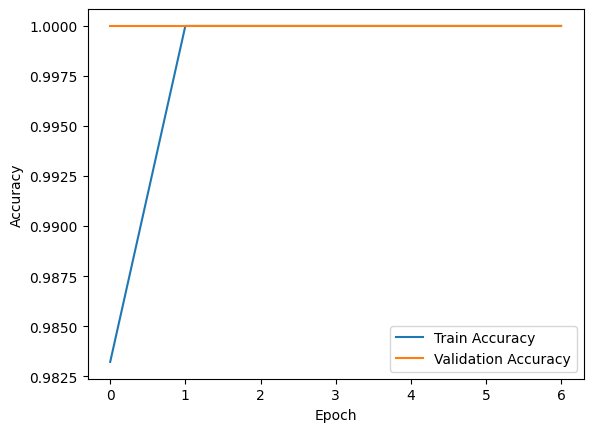

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Correcting the file paths
train_dir = r'D:\Deep Learning\deep l\dataset\train'  # Prefix with 'r' to make it a raw string
test_dir = r'D:\Deep Learning\deep l\dataset\test'

# Parameters
img_height, img_width = 128, 128
batch_size = 32
epochs = 30

# Data Augmentation and Generators
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.2,
                                   height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,
                                   horizontal_flip=True, fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(img_height, img_width),
                                                    batch_size=batch_size, class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(img_height, img_width),
                                                  batch_size=batch_size, class_mode='binary', shuffle=False)

# Model Architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_cat_detector.h5', monitor='val_accuracy', save_best_only=True)

# Training
history = model.fit(train_generator, validation_data=test_generator, epochs=epochs, 
                    callbacks=[early_stop, checkpoint])

# Plotting Training Results
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show() 


In [7]:
!pip install h5py


In [8]:
pip install h5py --upgrade


  Using cached h5py-3.11.0-cp38-cp38-win_amd64.whl.metadata (2.5 kB)
Using cached h5py-3.11.0-cp38-cp38-win_amd64.whl (3.0 MB)
  Attempting uninstall: h5py
    Found existing installation: h5py 2.10.0
    Uninstalling h5py-2.10.0:
      Successfully uninstalled h5py-2.10.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.13.0 requires tensorboard<2.14,>=2.13, but you have tensorboard 2.10.0 which is incompatible.
tensorflow-intel 2.13.0 requires typing-extensions<4.6.0,>=3.6.6, but you have typing-extensions 4.12.2 which is incompatible.
